Step1/2:

Loads libraries and prepares datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering,estimate_bandwidth,MeanShift
import scipy.cluster.hierarchy as sch
import seaborn as sns
scaler = StandardScaler()
enc = LabelEncoder()
# Ignore warnings
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
df1= pd.read_csv('data_refined.csv')
df2= pd.read_csv('insurance.csv')

In [3]:
df1 = df1.drop(df1.iloc[:, 0:2], axis=1)

In [4]:
df1=df1.replace(r'^\s*$', np.nan, regex=True)
df1.dropna(inplace=True,axis=0)
df1

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis_encoded
0,1.097064,-2.073335,1.269934,0.984375,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1
1,1.829821,-0.353632,1.685955,1.908708,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,1
2,1.579888,0.456187,1.566503,1.558884,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,1
3,-0.768909,0.253732,-0.592687,-0.764464,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,1
4,1.750297,-1.151816,1.776573,1.826229,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,1
...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1
565,1.704854,2.085134,1.615931,1.723842,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,1
566,0.702284,2.045574,0.672676,0.577953,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,1
567,1.838341,2.336457,1.982524,1.735218,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,1


In [5]:
df2=df2.replace(r'^\s*$', np.nan, regex=True)
df2.dropna(inplace=True,axis=0)
df2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
df2['sex']= enc.fit_transform(df2.sex.values)
df2['smoker']= enc.fit_transform(df2.smoker.values)
df2['region']= enc.fit_transform(df2.region.values)
df2

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [7]:
df2['bmi']= scaler.fit_transform(np.array(df2['bmi']).reshape(-1,1))
df2['age']= scaler.fit_transform(np.array(df2['age']).reshape(-1,1))
df2['charges']= scaler.fit_transform(np.array(df2['charges']).reshape(-1,1))
df2

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,-0.453320,0,1,3,0.298584
1,-1.509965,1,0.509621,1,0,2,-0.953689
2,-0.797954,1,0.383307,3,0,2,-0.728675
3,-0.441948,1,-1.305531,0,0,1,0.719843
4,-0.513149,1,-0.292556,0,0,1,-0.776802
...,...,...,...,...,...,...,...
1333,0.768473,1,0.050297,3,0,1,-0.220551
1334,-1.509965,0,0.206139,0,0,0,-0.914002
1335,-1.509965,0,1.014878,0,0,2,-0.961596
1336,-1.296362,0,-0.797813,0,0,3,-0.930362


Step 3:

Will Drop columns later if I believe necessary

Step 4.1:

Clustering the Refined Data

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Text(0, 0.5, 'SSE')

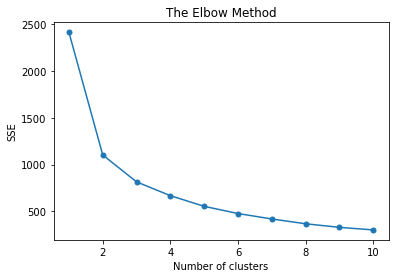

In [8]:
Rscores = []
for i in range(1, 11):
    Rmodel = KMeans(n_clusters=i, random_state=0)
    Rmodel.fit(df1)
    Rscores.append(Rmodel.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, 11), Rscores, marker='.', markersize=10)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE') # Model Inertia

In [36]:
modeldf1 = KMeans(n_clusters=5, random_state=0)
ydf1 = modeldf1.fit_predict(df1)
centresdf1=modeldf1.cluster_centers_
print(centresdf1)

[[ 2.02285714  0.88219283  2.03472091  2.15810342  0.10252984  0.16429656
   0.21199033  0.11914721  0.19412131  0.06067344  1.        ]
 [-0.17832467 -0.78463527 -0.19788308 -0.25966127  0.09302497  0.08714232
   0.05573789  0.03375622  0.17226581  0.06098748  0.07096774]
 [ 0.92477267  0.20724306  0.92206625  0.83002961  0.09999876  0.13327708
   0.14382573  0.08094213  0.18875618  0.06065056  0.96629213]
 [-0.18509539  1.16340592 -0.17746112 -0.25096107  0.0943147   0.1047256
   0.08345662  0.04353671  0.179014    0.0629104   0.48      ]
 [-0.97286092 -0.40841781 -0.96197489 -0.85471549  0.09649055  0.08235762
   0.04762119  0.02303219  0.1819378   0.06639488  0.03658537]]


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: Futu

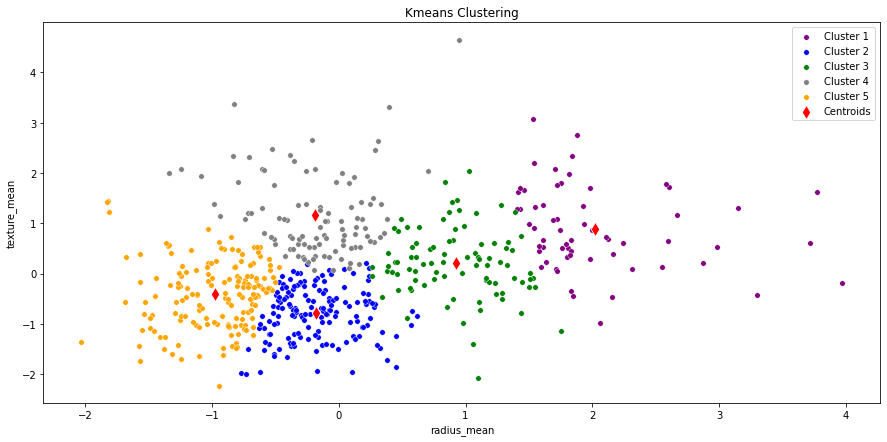

In [10]:
def KDF1Clus():
    plt.figure(figsize=(15,7))
    sns.scatterplot(df1.iloc[ydf1 == 0, 0], df1.iloc[ydf1 == 0, 1], color = 'purple', label = 'Cluster 1',s=30)
    sns.scatterplot(df1.iloc[ydf1 == 1, 0], df1.iloc[ydf1 == 1, 1], color = 'blue', label = 'Cluster 2',s=30)
    sns.scatterplot(df1.iloc[ydf1 == 2, 0], df1.iloc[ydf1 == 2, 1], color = 'green', label = 'Cluster 3',s=30)
    sns.scatterplot(df1.iloc[ydf1 == 3, 0], df1.iloc[ydf1 == 3, 1], color = 'grey', label = 'Cluster 4',s=30)
    sns.scatterplot(df1.iloc[ydf1 == 4, 0], df1.iloc[ydf1 == 4, 1], color = 'orange', label = 'Cluster 5',s=30)
    sns.scatterplot(modeldf1.cluster_centers_[:, 0], modeldf1.cluster_centers_[:, 1], color = 'red', 
                    label = 'Centroids',s=100,marker='d')
    plt.grid(False)
    plt.title('Kmeans Clustering')
    plt.legend()
    plt.show()
    return
KDF1Clus()

In [11]:
df1bandwidth = estimate_bandwidth(df1, quantile=0.2)
df1bandwidth

1.3960330590044778

In [12]:
df1_meanshift = MeanShift(bandwidth = df1bandwidth)
df1_meanshift.fit(df1)

yMdf1 = df1_meanshift.predict(df1)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: Futu

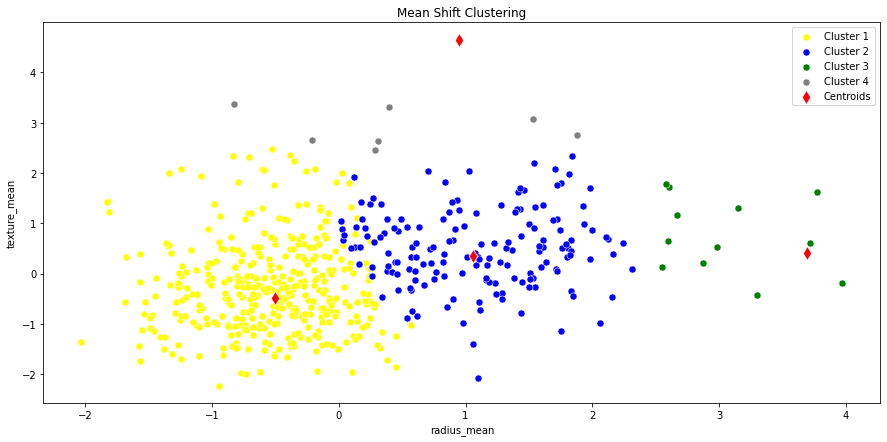

In [28]:
def MDF1Clus():
    import seaborn as sns
    plt.figure(figsize=(15,7))
    sns.scatterplot(df1.iloc[yMdf1 == 0, 0], df1.iloc[yMdf1 == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
    sns.scatterplot(df1.iloc[yMdf1 == 1, 0], df1.iloc[yMdf1 == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
    sns.scatterplot(df1.iloc[yMdf1 == 2, 0], df1.iloc[yMdf1 == 2, 1], color = 'green', label = 'Cluster 3',s=50)
    sns.scatterplot(df1.iloc[yMdf1 == 3, 0], df1.iloc[yMdf1 == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
    #githusns.scatterplot(df1.iloc[yMdf1 == 4, 0], df1.iloc[yMdf1 == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
    sns.scatterplot(df1_meanshift.cluster_centers_[:, 0], df1_meanshift.cluster_centers_[:, 1], color = 'red', 
                    label = 'Centroids',s=100,marker='d')
    plt.grid(False)
    plt.title('Mean Shift Clustering')
    plt.legend()
    plt.show()
    return
MDF1Clus()

Step 4.2:

Clustering the Insurance Data

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Text(0, 0.5, 'SSE')

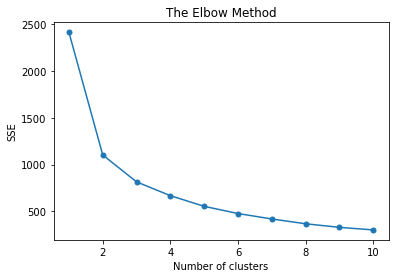

In [14]:
R2scores = []
for i in range(1, 11):
    R2model = KMeans(n_clusters=i, random_state=0)
    R2model.fit(df2)
    R2scores.append(R2model.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, 11), Rscores, marker='.', markersize=10)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE') # Model Inertia

In [18]:
modeldf2 = KMeans(n_clusters=6, random_state=0)
ydf2 = modeldf2.fit_predict(df2)
centresdf2=modeldf2.cluster_centers_

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: Futu

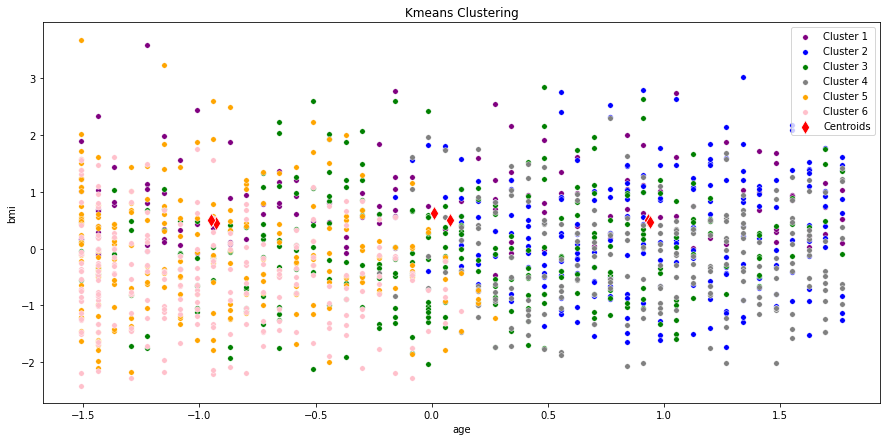

In [20]:
def KDF2Clus():
    plt.figure(figsize=(15,7))
    sns.scatterplot(df2.iloc[ydf2 == 0, 0], df2.iloc[ydf2 == 0, 2], color = 'purple', label = 'Cluster 1',s=30)
    sns.scatterplot(df2.iloc[ydf2 == 1, 0], df2.iloc[ydf2 == 1, 2], color = 'blue', label = 'Cluster 2',s=30)
    sns.scatterplot(df2.iloc[ydf2 == 2, 0], df2.iloc[ydf2 == 2, 2], color = 'green', label = 'Cluster 3',s=30)
    sns.scatterplot(df2.iloc[ydf2 == 3, 0], df2.iloc[ydf2 == 3, 2], color = 'grey', label = 'Cluster 4',s=30)
    sns.scatterplot(df2.iloc[ydf2 == 4, 0], df2.iloc[ydf2 == 4, 2], color = 'orange', label = 'Cluster 5',s=30)
    sns.scatterplot(df2.iloc[ydf2 == 5, 0], df2.iloc[ydf2 == 5, 2], color = 'pink', label = 'Cluster 6',s=30)
    sns.scatterplot(modeldf2.cluster_centers_[:, 0], modeldf2.cluster_centers_[:, 1], color = 'red', 
                    label = 'Centroids',s=100,marker='d')
    plt.grid(False)
    plt.title('Kmeans Clustering')
    plt.legend()
    plt.show()
    return
KDF2Clus()

In [62]:
df2bandwidth = estimate_bandwidth(df2, quantile=0.06)
df2bandwidth

1.8641024917283513

In [63]:
df2_meanshift = MeanShift(bandwidth = df2bandwidth)
df2_meanshift.fit(df2)

yMdf2 = df2_meanshift.predict(df2)

In [64]:
b2=df2_meanshift.cluster_centers_
b2

array([[-0.59589612,  0.49249249, -0.22128081,  0.60660661,  0.03003003,
         1.02702703, -0.64908558],
       [-0.72218818,  0.56410256, -0.14908058,  0.24358974,  0.79487179,
         2.17948718,  0.94570712],
       [ 0.62720043,  0.49206349, -0.35014123,  0.61904762,  0.79365079,
         0.52380952,  1.29603859],
       [ 0.35599678,  0.72413793,  0.73751565,  0.82758621,  1.        ,
         2.25862069,  2.39020121],
       [-0.01474046,  0.        , -2.02814701,  5.        ,  1.        ,
         3.        ,  0.47522571]])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: Futu

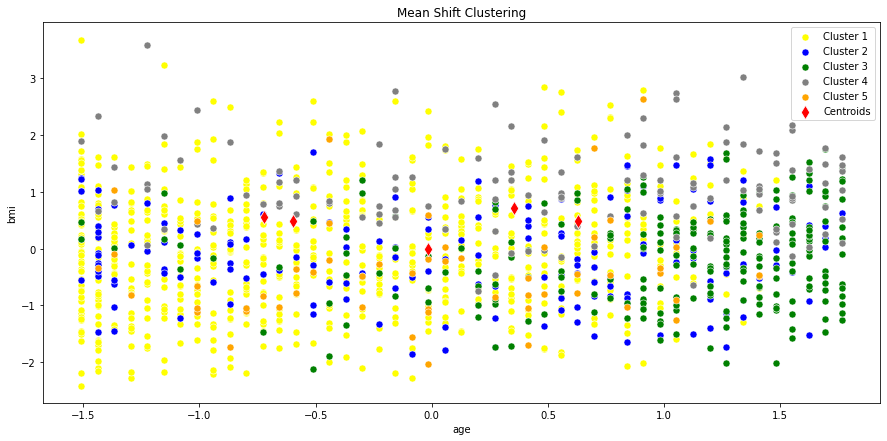

In [67]:
def MDF2Clus():
    import seaborn as sns
    plt.figure(figsize=(15,7))
    sns.scatterplot(df2.iloc[yMdf2 == 0, 0], df2.iloc[yMdf2 == 0, 2], color = 'yellow', label = 'Cluster 1',s=50)
    sns.scatterplot(df2.iloc[yMdf2 == 1, 0], df2.iloc[yMdf2 == 1, 2], color = 'blue', label = 'Cluster 2',s=50)
    sns.scatterplot(df2.iloc[yMdf2 == 2, 0], df2.iloc[yMdf2 == 2, 2], color = 'green', label = 'Cluster 3',s=50)
    sns.scatterplot(df2.iloc[yMdf2 == 3, 0], df2.iloc[yMdf2 == 3, 2], color = 'grey', label = 'Cluster 4',s=50)
    sns.scatterplot(df2.iloc[yMdf2 == 4, 0], df2.iloc[yMdf2 == 4, 2], color = 'orange', label = 'Cluster 5',s=50)
    sns.scatterplot(df2_meanshift.cluster_centers_[:, 0], df2_meanshift.cluster_centers_[:, 1], color = 'red',  label = 'Centroids',s=100,marker='d')
    plt.grid(False)
    plt.title('Mean Shift Clustering')
    plt.legend()
    plt.show()
    return
MDF2Clus()

Step 6:

Density Based Clustering

Which by the way seems to work decently?

In [80]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples = 3)
dy = dbscan.fit_predict(df1)

In [81]:
dy

array([-1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  1,  1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,  1,
        1,  1,  0,  0,  1,  0,  0,  1,  1,  1,  1,  0,  1,  0,  0,  1,  1,
        1,  1,  0,  1,  0,  0,  1,  0,  1,  0,  0,  1,  1,  1, -1,  0,  1,
        0,  0,  0,  1,  1,  1,  0,  1,  1,  0,  0,  1,  1,  1,  0,  0, -1,
        1,  1,  1,  0,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,
        0,  1,  0, -1,  1,  1,  1,  0,  0,  1,  0,  1,  0,  0,  1,  0,  0,
        1,  1,  0,  1,  1,  0,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  0, -1,  1,  1,  1,  0,  0,  1, -1,  1,  1,  0,  0,  1,
        1,  0, -1,  1,  1,  1,  1,  0,  1,  1, -1,  0,  0,  1,  0,  1,  0,
        1,  1,  1,  0,  1,  1, -1,  0,  1,  0,  0,  0,  0,  1,  0, -1,  0,
        1,  0,  1,  0,  1,  1,  0,  1, -1,  0,  0,  0,  1,  1,  0, -1,  1,
        1,  1,  0,  1,  1

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: Futu

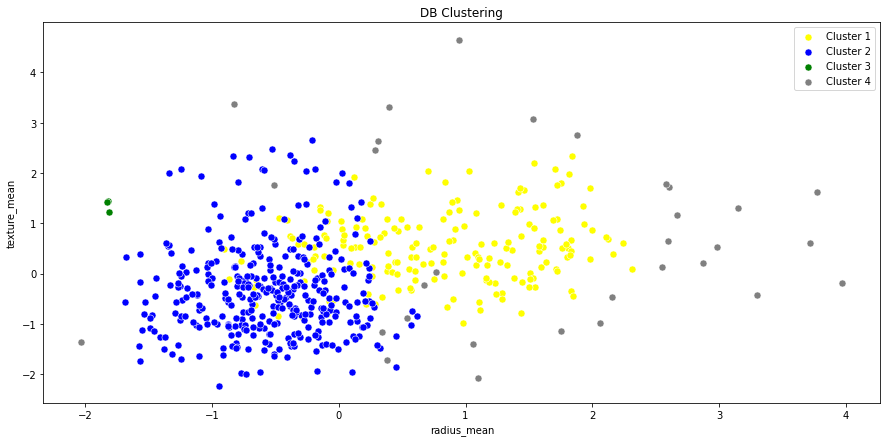

In [84]:
def DBClus():
    import seaborn as sns
    plt.figure(figsize=(15,7))
    sns.scatterplot(df1.iloc[dy == 0, 0], df1.iloc[dy == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
    sns.scatterplot(df1.iloc[dy == 1, 0], df1.iloc[dy == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
    sns.scatterplot(df1.iloc[dy == 2, 0], df1.iloc[dy == 2, 1], color = 'green', label = 'Cluster 3',s=50)
    sns.scatterplot(df1.iloc[dy == -1, 0], df1.iloc[dy == -1, 1], color = 'grey', label = 'Cluster 4',s=50)
    #sns.scatterplot(df1.iloc[dy == 4, 0], df1.iloc[dy == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
    plt.grid(False)
    plt.title('DB Clustering')
    plt.legend()
    plt.show()
    return
DBClus()